
<p style="font-size: 36px;">实验一：金融数据预处理实验指南</p>


软件2302 秦开祥 2312190411

# 实验目的

- 掌握数据预处理的几个基本流程

- 学习pandas、numpy等python包的使用，学会基于pandas进行数据预处理实验


# 实验步骤

## 导入相关的包
- 导入python的库pandas和numpy，导入后可以使用库中的函数方法

In [1]:
import pandas as pd   #导入pandas重命名为pd，后面如果要使用就是pd.xxxxx,如果没有重命名及时pandas.xxxxx
import numpy as np    #导入numpy重命名为np
import matplotlib.pyplot as plt
import seaborn as sns

## 读入数据集

>  <mark><font color=blue >【要求】写报告的时候自行添加cell，适当备注<font><mark>


- 载入数据

In [2]:
datas = pd.read_csv("./data/train_new.csv") # 将数据文件读入自定义的变量datas
datas_bk = datas.copy()  #复制原数据备用

- 查看样本数量和特征数量
- 检查读入数据的基本结构

In [3]:
datas.shape  #查看数据大小

(50000, 74)

In [4]:
datas.head(10)   #查看前10行

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4
5,6.0,700.0,66.0,5.0,0.0,20.0,0.0,NaN,2.0,3695.0,...,40.0,790.0,11.0,108.0,411.0,6.0,0.0,0.0,0,5
6,8.0,882.0,2578.0,20.0,0.0,10000.0,0.0,NaN,0.0,3005.0,...,60.0,405.0,429.0,46.0,669.0,6.0,0.0,0.0,0,6
7,6.0,831.0,8279.0,6.0,0.0,10.0,0.0,NaN,3.0,26931.0,...,104.0,559.0,1379.0,53.0,1413.0,6.0,0.0,0.0,0,7
8,0.0,1726.0,5737.0,21.0,0.0,20.0,0.0,NaN,1.0,18800.0,...,46.0,841.0,956.0,83.0,798.0,6.0,0.0,0.0,1,8
9,7.0,1730.0,6318.0,20.0,0.0,3000.0,0.0,NaN,9.0,10120.0,...,79.0,329.0,1053.0,34.0,2248.0,6.0,0.0,0.0,0,9


- 观察数据，最后一列id冗余，可删除，寻找pandas删除一列数据的方法

> iloc[]函数，属于pandas库，全称为index location，即对数据进行位置索引，从而在数据表中提取出相应的数据。
> iloc[a:b,c:d]:取行索引从a到b-1，列索引从c到d-1的数据。

In [5]:
datas = datas.iloc[:, :-1] #调用iloc函数去掉最后一列的id
datas.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0
5,6.0,700.0,66.0,5.0,0.0,20.0,0.0,NaN,2.0,3695.0,...,2981.0,40.0,790.0,11.0,108.0,411.0,6.0,0.0,0.0,0
6,8.0,882.0,2578.0,20.0,0.0,10000.0,0.0,NaN,0.0,3005.0,...,1511.0,60.0,405.0,429.0,46.0,669.0,6.0,0.0,0.0,0
7,6.0,831.0,8279.0,6.0,0.0,10.0,0.0,NaN,3.0,26931.0,...,7489.0,104.0,559.0,1379.0,53.0,1413.0,6.0,0.0,0.0,0
8,0.0,1726.0,5737.0,21.0,0.0,20.0,0.0,NaN,1.0,18800.0,...,3059.0,46.0,841.0,956.0,83.0,798.0,6.0,0.0,0.0,1
9,7.0,1730.0,6318.0,20.0,0.0,3000.0,0.0,NaN,9.0,10120.0,...,2204.0,79.0,329.0,1053.0,34.0,2248.0,6.0,0.0,0.0,0


- 查看每一列X1-X72的含义
*  <mark><font color=blue>【要求】尝试探索index_col用法<font><mark>

In [6]:
feature = pd.read_csv("./data/feature_x.csv",index_col = 0) # 将数据文件读入自定义的变量datas
feature

,output_feat,description,type,detail
1,X1,手机号归属地,类别,映射为哈希值
2,X2,籍贯,类别,映射为哈希值
3,X3,与黑名单用户联系次数,整型,大于零的整数
4,X4,近六个月通话次数,整型,大于零的整数
5,X5,近六个月搜索次数,整型,大于零的整数
...,...,...,...,...
68,X68,总充值金额,整型,大于零的整数
69,X69,平均充值金额,整型,大于零的整数
70,X70,上个月短信条数,整型,大于零的整数
71,X71,短信总条数,整型,大于零的整数


## 观察数据
- 数据缺失情况
- 特征之间、特征与Label的相关度等

### 观察数据缺失情况

- 按缺失值数目从大到小排列


In [7]:
# data.isnull()会用bool值填充每个数据，数据不为空填充False，数据为空填充True
ct_nan = datas.isnull()
ct_nan.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# 先isnull查找缺失值，再sum求和
ct_nan=datas.isnull().sum()
ct_nan

X1     5851
X2      390
X3      817
X4     4280
X5     8891
       ... 
X69    4825
X70     390
X71    8127
X72    8891
Y         0
Length: 73, dtype: int64

In [9]:
# 先sinul查找缺失值，再sum求，最后排序
datas.isnull().sum().sort_values(ascending=False)

X23    48539
X8     48466
X26    47775
X39    47702
X49    35774
       ...  
X59      390
X11      390
X20      390
X2       390
Y          0
Length: 73, dtype: int64

### 观察数据相关度

- 什么是数据相关度
- 计算特征之间、特征与label之间的相关度
- 绘制相关度的热力图
#### 数据相关度
- 相关：数据之间有关联，相互有影响
> <br>如：A和B 存在一定的相关性，A对B存在一定程度的影响，A变化，B也会有一定的变化
<br>如果A和B相等 或者 B可以由A经过计算得到---->完全相关
<br>如果B是由 A和C计算得到 ---->并且 A可以计算出B的大部分 -----> A和B 强度相关
<br>如果B是由 A和C计算得到 ---->并且 A可以计算出B的小部分 -----> A和B 弱度相关
<br>如果 A和B 毫无关系 ----> 不相关
<br>A的增大导致B的减小 —> 负相关
<br>A的增大导致B的增大 —> 正相关
- 相关性系数：衡量相关性强弱的
> 其范围是[-1,1]，绝对值越靠近0，表示不相关，绝对值越靠近1，表示相关性越强小于 0 表示负相关；大于 0 表示正相关。
#### 计算相关度:  pandas相关系数-DataFrame.corr()

> <br> - 参数说明
<br>method：可选值为{‘pearson’, ‘kendall’, ‘spearman’}
<br>pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性数据便会有误差。
<br>kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正太分布的数据
<br>spearman：非线性的，非正太分布的数据的相关系数
<br>min_periods：样本最少的数据量
><br>参考网址https://www.jb51.net/article/255666.htm
.也可以自行百度探索


In [10]:
# 计算特征之间、特征与Label的相关度
datas.corr()  #直接调用，默认使用皮尔森相关系数

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
X1,1.000000,0.005091,0.002445,-0.002521,-0.002863,0.000576,0.000510,-0.021082,-0.003949,0.002748,...,-0.000402,0.003696,0.004220,0.002194,-0.000705,0.002501,-0.007212,-0.008667,-0.002907,-0.007396
X2,0.005091,1.000000,0.130124,0.067872,-0.003727,0.012351,-0.055850,-0.002901,0.001000,0.055909,...,-0.016482,0.637134,0.114426,0.127659,-0.069287,0.198605,0.135124,-0.001806,-0.000636,-0.052612
X3,0.002445,0.130124,1.000000,0.147500,-0.010805,-0.005790,-0.029100,-0.013539,0.089222,0.021502,...,0.016149,0.110435,0.060165,0.997757,-0.025897,0.096623,0.137174,-0.025698,-0.009129,-0.012419
X4,-0.002521,0.067872,0.147500,1.000000,-0.004435,-0.002231,-0.092175,0.020393,0.600068,0.003959,...,0.011446,0.166057,0.036125,0.146015,-0.038666,0.079479,0.029898,-0.009281,-0.000339,0.066437
X5,-0.002863,-0.003727,-0.010805,-0.004435,1.000000,-0.000061,-0.001668,0.300385,-0.006101,0.002267,...,-0.001121,-0.005177,0.002582,-0.010871,0.000487,0.008904,-0.007493,0.196436,0.842313,-0.008346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X69,0.002501,0.198605,0.096623,0.079479,0.008904,0.004956,-0.056519,0.088659,-0.011450,0.049408,...,-0.030859,0.153344,0.322485,0.096927,-0.012624,1.000000,0.030909,0.004654,0.011872,-0.119884
X70,-0.007212,0.135124,0.137174,0.029898,-0.007493,-0.008236,-0.041117,0.008881,0.022129,-0.005804,...,-0.009115,0.060157,-0.001739,0.132304,-0.036921,0.030909,1.000000,-0.006705,-0.016463,-0.045284
X71,-0.008667,-0.001806,-0.025698,-0.009281,0.196436,0.003521,0.010249,0.296526,-0.012271,0.007085,...,0.006716,0.004516,0.002975,-0.025757,0.002539,0.004654,-0.006705,1.000000,0.184319,-0.005033
X72,-0.002907,-0.000636,-0.009129,-0.000339,0.842313,0.000449,-0.001397,0.298793,-0.002344,0.003051,...,-0.001884,-0.002591,-0.000601,-0.009179,0.001226,0.011872,-0.016463,0.184319,1.000000,-0.004945


*  <mark><font color=blue >【要求】尝试探索corr其他methon计算相关性<font><mark>

#### 画热力图
- 使用到了python库中的matplotlib库画图和seaborn库
- seaborn库的热力图可用来显示两变量之间的相关性，在这里两变量间对应的矩形框的颜色越浅，代表两者之间的相关性越强
*  <mark><font color=blue >【要求】探索seaborn函数方法，可参考https://zhuanlan.zhihu.com/p/444175795<font><mark>


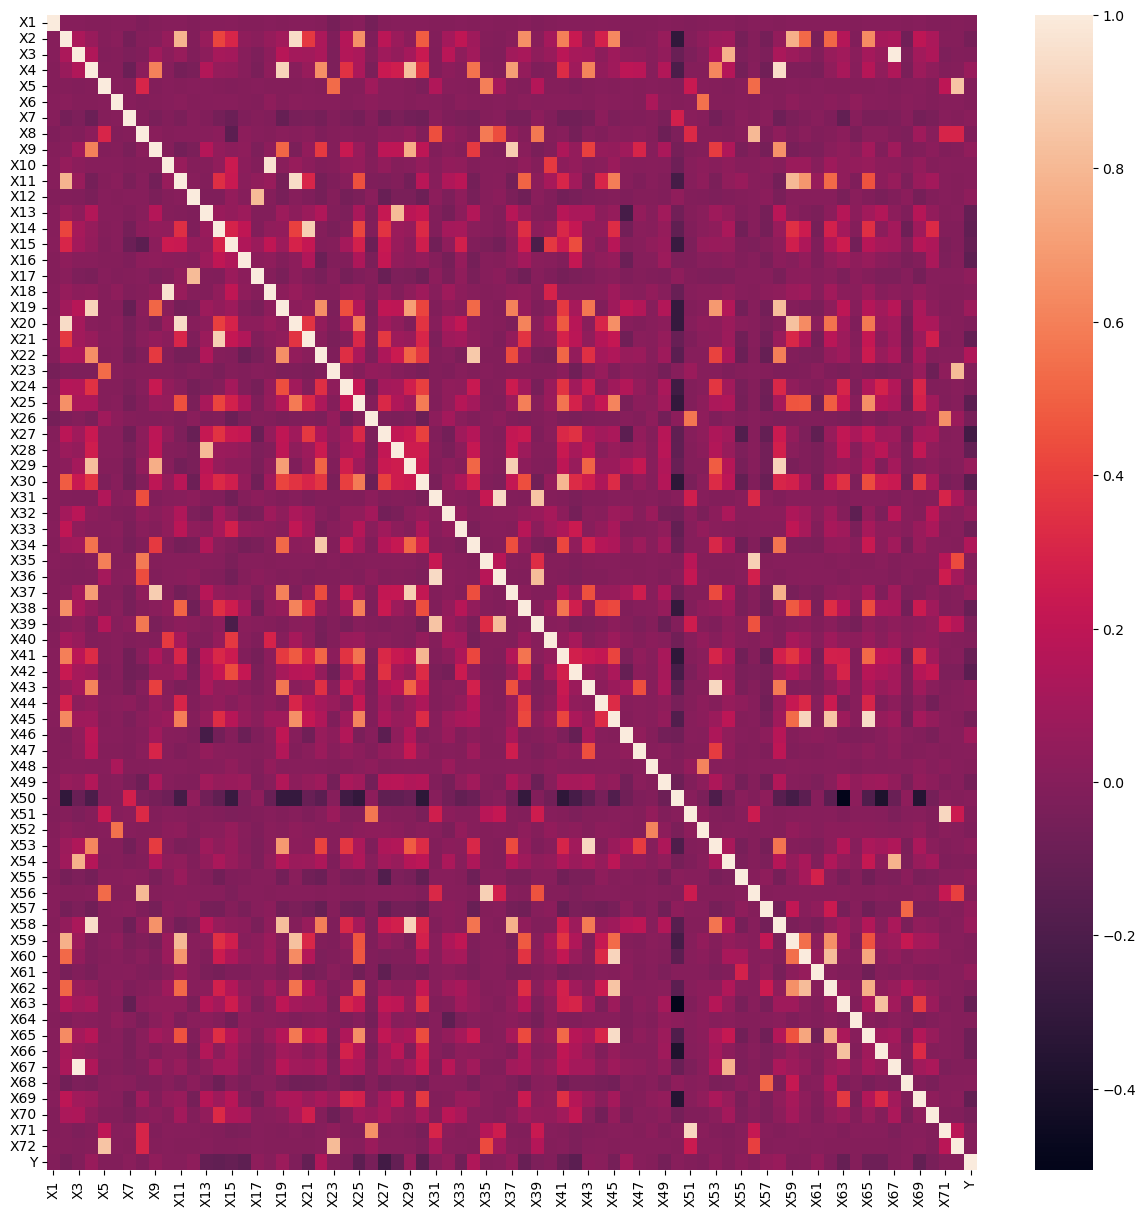

In [11]:
plt.figure(figsize=(15,15)) #图片大小
sns.heatmap(datas.corr())
plt.show()

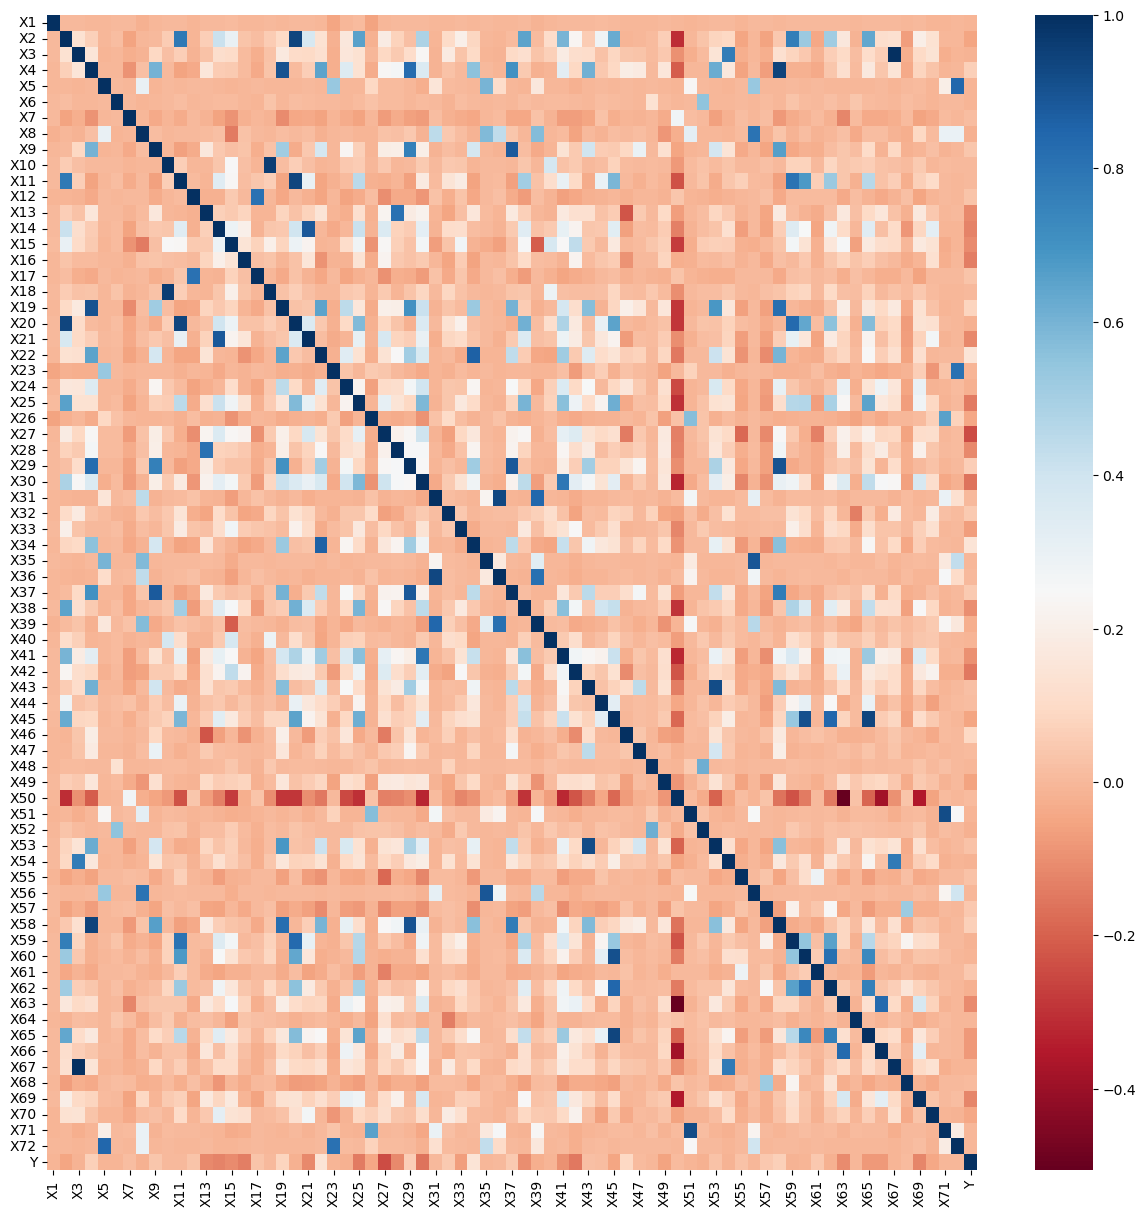

In [12]:
plt.figure(figsize=(15,15)) #图片大小
sns.heatmap(datas.corr(), cmap='RdBu')
plt.show()

## 处理缺失数据
每种处理方式新建一个cell，适当备注

- 再次查看缺失情况

In [13]:
# 先sinul查找缺失值，再sum求，最后排序
datas.isnull().sum().sort_values(ascending=False)  #按列

X23    48539
X8     48466
X26    47775
X39    47702
X49    35774
       ...  
X59      390
X11      390
X20      390
X2       390
Y          0
Length: 73, dtype: int64

In [14]:
datas.isnull().sum(axis=1).sort_values(ascending=False)  #按行

38151    69
29442    69
9477     69
1911     69
20897    69
         ..
31786     0
170       0
33873     0
25549     0
573       0
Length: 50000, dtype: int64

### 删除缺失值数目过多的样本点

保留至少含有50个非NaN feature的样本点

- 删除有NA值的⾏ --- dropna函数
> <br>注意：thresh = x 表示的是⾄少有x个⾮NA的值，这⼀⾏才能被留下
<br>thresh = 50 表示如果⼀⾏的NA值多于72 - 50 = 22的话就要被删除

In [15]:
# 保留至少含有50个非NaN feature的样本点
datas = datas.dropna(thresh=50)
datas.shape    #原来的shap是50000，73（删掉了第74列的id）

(45670, 73)

### 缺失值填充方法（根据不同数据集，寻找一种合适当前数据集的方式）


#### 缺失值填充为-1
- fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

> -参数
<br>inplace参数的取值：True、False
<br>True：直接修改原对象
<br>False：创建一个副本，修改副本，原对象不变（缺省默认,因此以下操作均为展示，并不会改变data本身）

> -参数
<br>method参数的取值 ： {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None
<br>pad/ffill：用前一个非缺失值去填充该缺失值
<br>backfill/bfill：用下一个非缺失值填充该缺失值
<br>None：指定一个值去替换缺失值（缺省默认这种方式）

> -参数
<br>limit参数：限制填充个数
<br>axis参数：修改填充方向

In [16]:
datas.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


In [17]:
datas.fillna(-1).head()   #先执行fillna函数，然后head

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,-1.0,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,-1.0,10000.0,0.0,-1.0,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,-1.0,-1.0,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,-1.0,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,-1.0,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,-1.0,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


####  缺失值填充：填充前/后一个有效值
注：使用ffill/backfill填充时，还是存在部分为NaN的可能性，因此这里采取先后使用前后填充的方式，避免NaN值依旧存在

In [18]:
datas.fillna(method='backfill').fillna(method='ffill').head()

C:\Users\33530\AppData\Local\Temp\ipykernel_13552\2222242356.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datas.fillna(method='backfill').fillna(method='ffill').head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,3145728.0,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,0.0,10000.0,0.0,3145728.0,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,0.0,0.0,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,3145728.0,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,3145728.0,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,3145728.0,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


#### 缺失值填充：填充中位数或者平均值
- Pandas中的统计运算函数 

利用`datas.median()`求出datas的中位数。返回数据的中位数。使用DataFrame数据调用median()函数，返回结果为DataFrame中每一列的中位数，median()也不能计算字符串或object的中位数，会自动将不能计算的列省略。


利用`datas.mean()`求出datas的均值。返回数据的均值。使用DataFrame数据调用mean()函数，返回结果为DataFrame中每一列的平均值，mean()与max()和min()不同的是，不能计算字符串或object的平均值，所以会自动将不能计算的列省略。



In [19]:
datas.fillna(datas.median()).head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,60000.0,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,0.0,10000.0,0.0,60000.0,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,0.0,0.0,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,60000.0,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,60000.0,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,60000.0,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


In [20]:
datas.fillna(datas.mean()).head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.000000e+00,800.0,0.0,7.344176e+08,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.000000,0.000000e+00,1
1,2.0,250.0,38.0,6.0,4.544727e+08,10000.0,0.0,7.344176e+08,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,153458.463881,1.896158e+08,1
2,2.0,1054.0,178.0,1.0,0.000000e+00,1000.0,0.0,7.344176e+08,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.000000,0.000000e+00,0
3,10.0,1398.0,679.0,7.0,0.000000e+00,10000.0,0.0,7.344176e+08,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.000000,0.000000e+00,1
4,2.0,1095.0,305.0,11.0,0.000000e+00,10000.0,0.0,7.344176e+08,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.000000,0.000000e+00,0


#### 缺失值填充：填充众数
`datas.mode()`获得该列“众数”，即本特征下取值最多的那个特征值（返回的是DataFrame类型数据，可能不止一个结果）。
无法直接用于填充，需要用`.iloc[0]`将其转换为series数据，我们用第一行进行缺失值填充。



In [21]:
datas.mode()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,5.0,0.0,25.0,3.0,0.0,10000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,66.0,0.0,6.0,0.0,0.0,0.0
1,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
datas.fillna(datas.mode().iloc[0]).head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,0.0,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,0.0,10000.0,0.0,0.0,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,0.0,0.0,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,0.0,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,0.0,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,0.0,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


<mark><font color=blue >以上操作并不会改变datas本身<br>【要求】选择最合适的控制填充方法，说明理由，修改数据<font><mark>
    


In [23]:
data_fillna = datas.fillna(datas.mode().iloc[0])

## 数据变换与离散化
<mark><font color=blue>下面的报告需要大家自行探索、研究完善<br>适当备注：变换方式，变换参数...<font><mark>
    

###  缩放(Scaling)

最大最小值规范：$\hat x = \frac{x-x_{min}} {x_{max} \ - x_{min}}$

In [24]:
data_fillna.head()  #先查看一下原数据

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,0.0,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,0.0,10000.0,0.0,0.0,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,0.0,0.0,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,0.0,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,0.0,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,0.0,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


In [25]:
# 找到所有数值属性，本数据集中，由于已经做过数字映射，因此特征均为数字属性
X_scale = data_fillna.copy()
numeriic_feats = X_scale.dtypes[X_scale.dtypes != 'object'].index

# 使用最大最小值规范
X_scale[numeriic_feats] = X_scale[numeriic_feats].apply(lambda x: (x-x.min())/(x.max()-x.min()))

X_scale.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,0.818182,0.094984,0.248237,0.163934,0.0,0.008626,0.0,0.0,0.00,0.000096,...,0.794779,0.003107,0.427520,0.212735,0.013330,0.022994,0.250000,0.0,0.0,1.0
1,0.181818,0.016287,0.000550,0.098361,0.0,0.009481,0.0,0.0,0.04,0.001404,...,0.788143,0.015536,0.585725,0.000608,0.017486,0.018746,0.208333,0.0,0.0,1.0
2,0.181818,0.068664,0.002577,0.016393,0.0,0.008644,0.0,0.0,0.04,0.002012,...,0.801945,0.118591,0.538631,0.002519,0.011180,0.000462,0.250000,0.0,0.0,0.0
3,0.909091,0.091075,0.009830,0.114754,0.0,0.009481,0.0,0.0,0.04,0.002044,...,0.801586,0.005179,0.026490,0.009816,0.011753,0.001616,0.250000,0.0,0.0,1.0
4,0.181818,0.071336,0.004415,0.180328,0.0,0.009481,0.0,0.0,0.08,0.001767,...,0.800740,0.047644,0.290655,0.004343,0.006880,0.022671,0.208333,0.0,0.0,0.0


### 规范化(Normalization)

标准正规化：$\hat x = \frac{x-u}{\sigma}$

In [26]:
X_norm = data_fillna.copy()
# 标准正规化
X_norm[numeriic_feats] = X_norm[numeriic_feats].apply(lambda x:(x-x.mean())/(x.std())) 

X_norm.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,1.095123,0.518081,5.666816,-0.058040,-0.019759,-0.104784,-0.093404,-0.004993,-0.789470,-0.242929,...,-0.011956,-0.903603,0.455477,4.795353,0.229813,-0.200053,0.334238,-0.065935,-0.016637,1.313541
1,-1.081790,-1.059527,-0.483917,-0.557041,-0.019759,0.069253,-0.093404,-0.004993,-0.393208,0.018701,...,-1.130550,-0.721685,1.222032,-0.485802,0.726085,-0.271496,-0.923458,-0.065935,-0.016637,1.313541
2,-1.081790,-0.009530,-0.433586,-1.180792,-0.019759,-0.101001,-0.093404,-0.004993,-0.393208,0.140261,...,1.195865,0.786710,0.993848,-0.438224,-0.026880,-0.579015,0.334238,-0.065935,-0.016637,-0.761284
3,1.406110,0.439723,-0.253475,-0.432291,-0.019759,0.069253,-0.093404,-0.004993,-0.393208,0.146636,...,1.135357,-0.873283,-1.487649,-0.256563,0.041571,-0.559601,0.334238,-0.065935,-0.016637,1.313541
4,-1.081790,0.044015,-0.387929,0.066710,-0.019759,0.069253,-0.093404,-0.004993,0.003054,0.091382,...,0.992846,-0.251733,-0.207682,-0.392809,-0.540265,-0.205488,-0.923458,-0.065935,-0.016637,-0.761284


### 离散化(Discretization)
说明分箱方式、分箱数量等

<mark><font color=blue>探索分箱原理、报告内适当说明<font><mark>

#### 等深分箱

分箱数目：10

In [27]:
data_fillna.head()   #查看原始数据便于对比

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X64,X65,X66,X67,X68,X69,X70,X71,X72,Y
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,0.0,0.0,679.0,...,2375.0,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1
1,2.0,250.0,38.0,6.0,0.0,10000.0,0.0,0.0,1.0,12990.0,...,-16204.0,31.0,796.0,7.0,122.0,406.0,5.0,0.0,0.0,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,0.0,1.0,18710.0,...,22436.0,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,0.0,1.0,19010.0,...,21431.0,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,0.0,2.0,16410.0,...,19064.0,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0


In [28]:
X = data_fillna.copy()
X.X65_bin = pd.qcut(X["X65"], q=10, duplicates='drop')  #以X65属性分箱
X.X65_bin

C:\Users\33530\AppData\Local\Temp\ipykernel_13552\1856665283.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.X65_bin = pd.qcut(X["X65"], q=10, duplicates='drop')  #以X65属性分箱


0          (0.999, 10.0]
1           (26.0, 43.0]
2         (201.0, 291.0]
3           (10.0, 26.0]
4          (88.0, 115.0]
              ...       
49994    (291.0, 1932.0]
49996     (115.0, 151.0]
49997     (115.0, 151.0]
49998       (10.0, 26.0]
49999       (10.0, 26.0]
Name: X65, Length: 45670, dtype: category
Categories (10, interval[float64, right]): [(0.999, 10.0] < (10.0, 26.0] < (26.0, 43.0] < (43.0, 64.0] ... (115.0, 151.0] < (151.0, 201.0] < (201.0, 291.0] < (291.0, 1932.0]]

关于这个报错，请参考https://blog.csdn.net/weixin_41677555/article/details/82861708
如何避免这个Warning？

In [29]:
X.X65_bin.value_counts()

X65
(10.0, 26.0]       4834
(64.0, 88.0]       4590
(0.999, 10.0]      4584
(43.0, 64.0]       4579
(115.0, 151.0]     4569
(151.0, 201.0]     4560
(201.0, 291.0]     4554
(291.0, 1932.0]    4528
(88.0, 115.0]      4496
(26.0, 43.0]       4376
Name: count, dtype: int64

##### 等宽分箱

分箱区间: [2, 4, 6, 8, 10, 12]

In [30]:
X.X1_bin = pd.cut(X.X1, bins=[2,4,6,8,10,12])
X.X1_bin

C:\Users\33530\AppData\Local\Temp\ipykernel_13552\2221257172.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.X1_bin = pd.cut(X.X1, bins=[2,4,6,8,10,12])


0        (8.0, 10.0]
1                NaN
2                NaN
3        (8.0, 10.0]
4                NaN
            ...     
49994    (8.0, 10.0]
49996     (4.0, 6.0]
49997     (4.0, 6.0]
49998    (8.0, 10.0]
49999     (6.0, 8.0]
Name: X1, Length: 45670, dtype: category
Categories (5, interval[int64, right]): [(2, 4] < (4, 6] < (6, 8] < (8, 10] < (10, 12]]

In [31]:
X.X1_bin.value_counts()

X1
(4, 6]      11817
(6, 8]       7560
(2, 4]       7056
(8, 10]      6398
(10, 12]     3302
Name: count, dtype: int64

In [32]:
X['X66_bin'] = pd.cut(X.X66, bins=[-3,-2,-1,0,1,2,3])
X.X66_bin.value_counts()

X66_bin
(-1, 0]     860
(0, 1]       39
(1, 2]       31
(2, 3]       20
(-3, -2]      0
(-2, -1]      0
Name: count, dtype: int64

## 特征构造(交叉)（可选扩充学习）
说明源特征、交叉方式等

学习参考https://zhuanlan.zhihu.com/p/457853657
